In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f12991d3650>)

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [170]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy
%matplotlib inline

In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
fig = px.histogram(medical_df, 
                   x = 'age',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(medical_df, x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title = 'Distributon of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)

In [31]:

fig = px.histogram(medical_df,
                   x = 'charges',
                   y = 'sex',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence=['blue', 'red'])
fig.update_layout(bargap=0.1)

In [26]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   y = 'region',
                   marginal = 'box',
                   color = 'region',
                   color_discrete_sequence=['green', 'blue', 'red', 'yellow'])
fig.update_layout(bargap=0.1)
fig.show()

In [27]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [28]:
px.histogram(medical_df, x = 'smoker', color='sex', title='Smoker')

In [35]:
px.histogram(medical_df, x = 'sex', title='Sex', color='sex')

In [36]:
px.histogram(medical_df, x = 'region', color='region')

In [40]:
px.histogram(medical_df, x = 'children', color='smoker').update_layout(bargap=0.1)

In [43]:
fig = px.scatter(medical_df, x = 'age', 
                 y = 'charges', 
                 color = 'smoker', 
                 opacity=0.8,
                 hover_data = ['sex'],
                 title = 'Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     

> **EXERCISE**: What other inferences can you draw from the above chart?
>
> ???

In [46]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [55]:
fig = px.violin(medical_df, x="children", y="charges")
fig.show()

<Axes: xlabel='sex', ylabel='charges'>

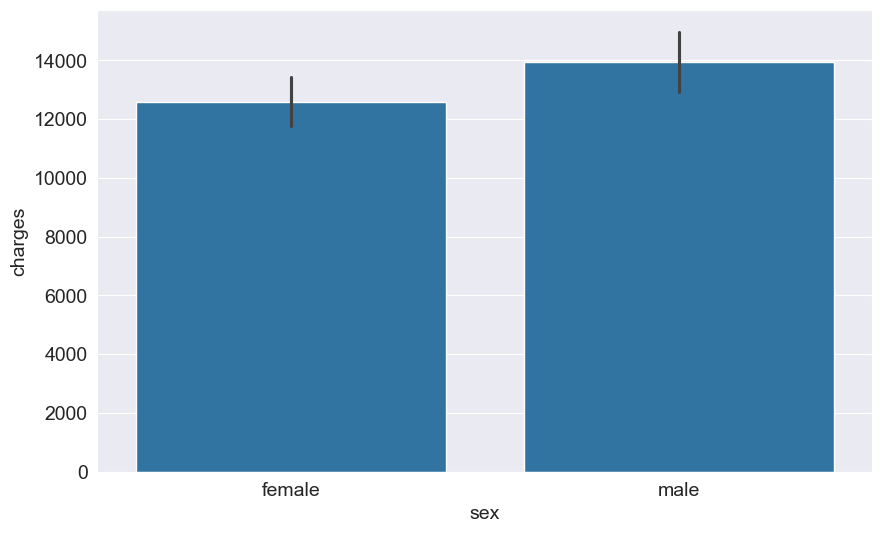

In [53]:
sns.barplot(medical_df, x='sex', y='charges')

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.


In [56]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [57]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [61]:
smoker_values = {'no' : 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [63]:
medical_df.corr(numeric_only=True)


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

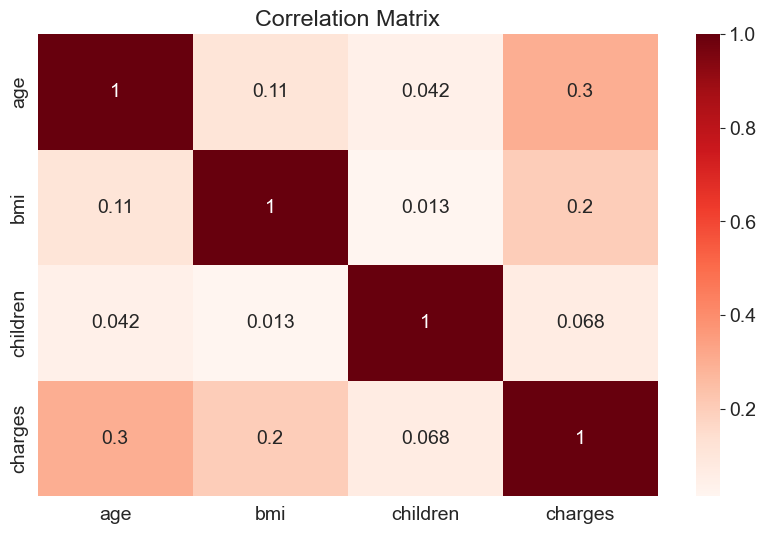

In [65]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [66]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

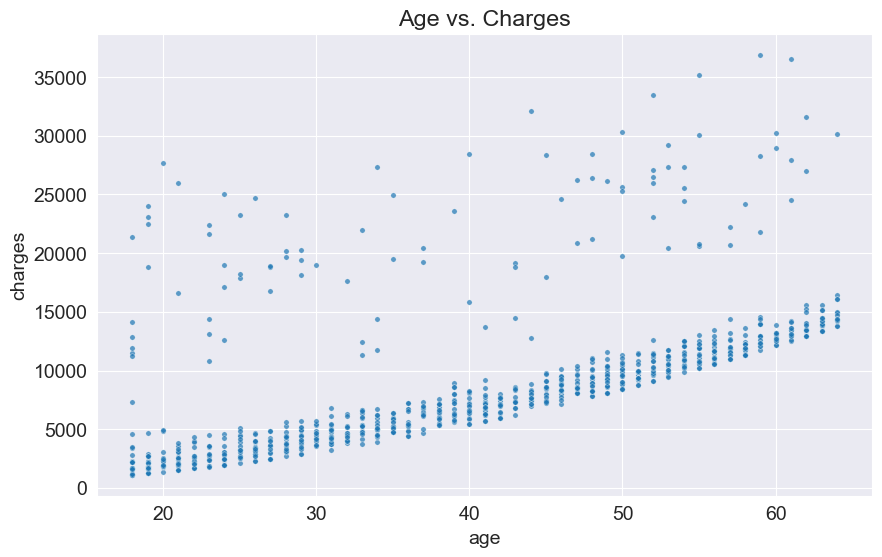

In [67]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s = 15);

In [86]:
from sklearn.linear_model import LinearRegression, SGDRegressor
import numpy as np

In [69]:
model = LinearRegression()

In [81]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [70]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [72]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape : ', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape :  (1064, 1)
targets.shape : (1064,)


In [73]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
model.predict(np.array([[23], 
                       [37],
                       [61]]))

/home/ayo/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [78]:
predictions = model.predict(inputs)

In [79]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [82]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [83]:
model.coef_

array([267.24891283])

In [84]:
model.intercept_

np.float64(-2091.4205565650864)

In [115]:
model2 = SGDRegressor()

In [116]:
help(model2.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [117]:
model2.fit(inputs, targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [118]:
model.predict(np.array([[23], 
                       [37],
                       [61]]))

/home/ayo/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [119]:
predictions = model2.predict(inputs)

In [120]:
predictions

array([3205.00225431, 4632.8623691 , 5346.7924265 , ..., 3205.00225431,
       3205.00225431, 3633.36028875], shape=(1064,))

In [121]:
rmse(targets, predictions)

np.float64(5435.2955223285035)

In [123]:
model2.coef_

array([142.78601148])

In [124]:
model2.intercept_

array([634.85404767])

In [127]:
def estimate_charges(age, w, b):
    return w * age + b

In [125]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  5435.2955223285035


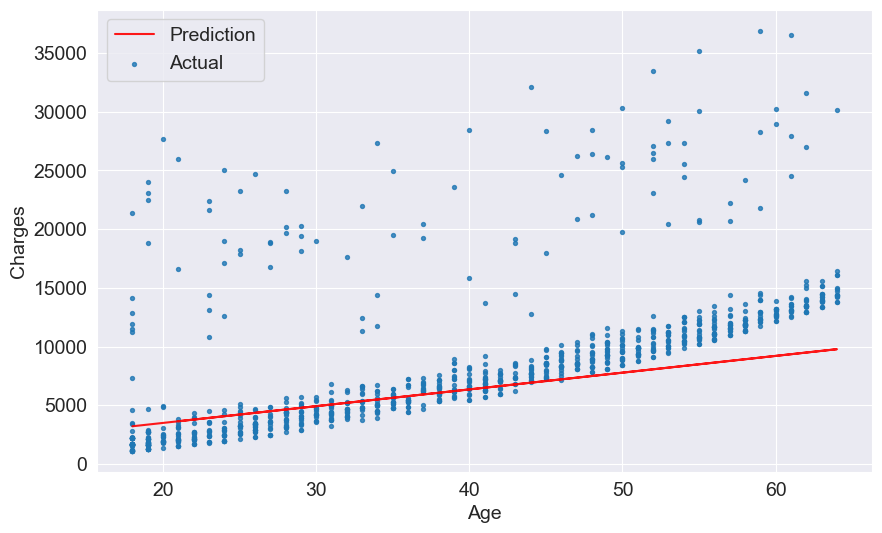

In [128]:
try_parameters(model2.coef_, model2.intercept_)

RMSE Loss:  4662.505766636395


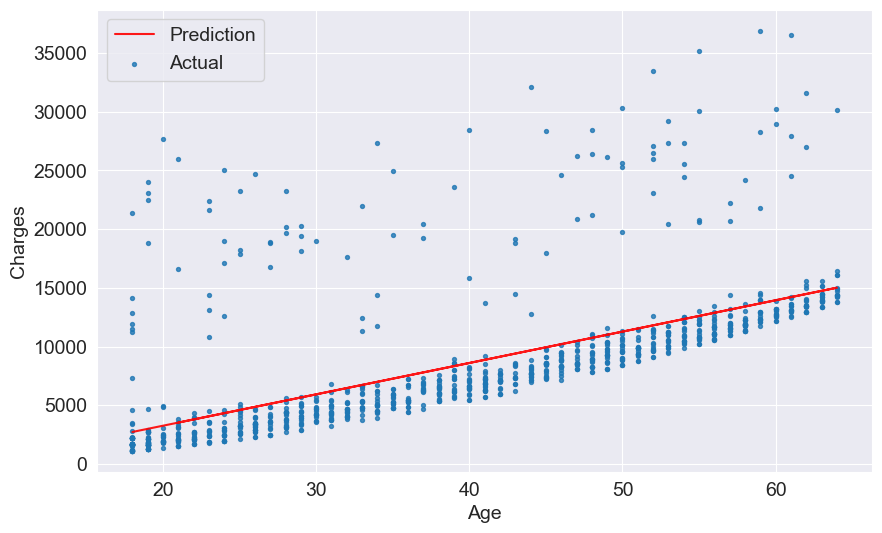

In [129]:
try_parameters(model.coef_, model.intercept_)

Text(0.5, 1.0, 'Charges vs Non Smokers')

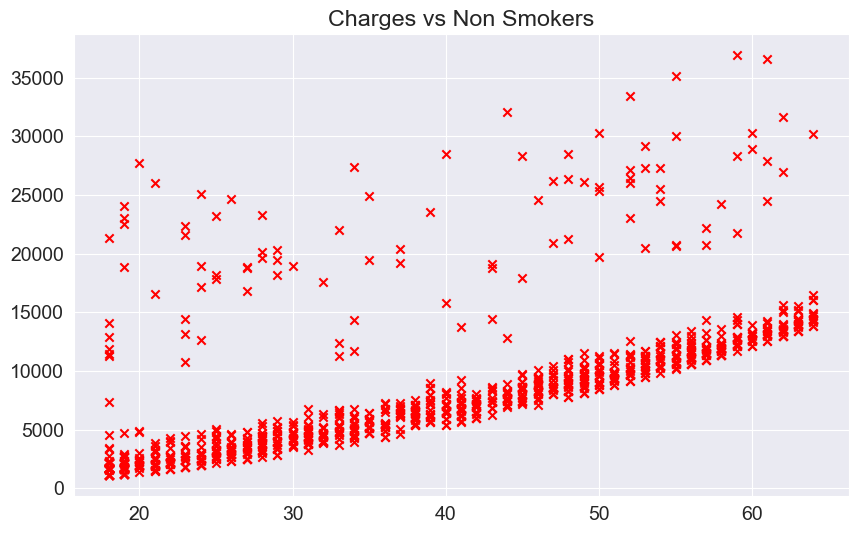

In [132]:
plt.scatter(inputs, targets, marker = 'x', c = 'r')

plt.title("Charges vs Non Smokers")

In [172]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regressing
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost for using w, b as parameters for linear regression
        to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]
    
    total_cost = 0
    
    for i in range (m):
        fw_b_i = np.dot(x[i], w) + b
        total_cost  = total_cost + (fw_b_i - y[i]) **2
    total_cost = total_cost / (2 * m)
    return total_cost



In [173]:

X_train = inputs.to_numpy()
y_train = inputs.to_numpy()
compute_cost(X_train, y_train, 2, 1)
# print(inputs)
# print(targets)

array([914.56578947])

In [174]:
def compute_gradient_descent_parameters(X, y, w, b):
    """
    Computes gradient parameters for linear regression
    Args:
        X (ndarray) : Shape (m, )   Input of the model (age)
        y (ndarray) : Shape (m, )   Label (Actual charges)
        w, b (scalar) : Parameters of the model
    Returns:
    dj_dw (scalar) : The gradient of the cost w.r.t the parameters w
    dj_db (scalar) : The gradient of the cost w.r.t the parameters b
    """
    
    m = X.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        fw_b_i = np.dot(X[i], w) + b
        err = fw_b_i - y[i]
        dj_dw += err * X[i]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db
    
    

In [163]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient_descent_parameters(X_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): [-1749.36090226] [-39.38533835]


In [175]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [177]:
initial_w = 0.
initial_b = 0.

#some gradient descent settings
iterations = 100
alpha = 0.01

w,b,_,_ = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient_descent_parameters, alpha, iterations)

print("w,b found by gradient descent:", w, b)

/tmp/ipykernel_9526/3642737384.py:47: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Iteration    0: Cost 238203.24   
Iteration   10: Cost 534478600372798430642595430400.00   
Iteration   20: Cost 1199258959961096655551267466334692306398376938533027840.00   
Iteration   30: Cost 2690888001958929613641635894506464487473836895292474307313731322568601847726080.00   
Iteration   40: Cost 6037793738327548880717226999604809701444865951569190289604138761523115458624838787149596728106625794048.00   
Iteration   50: Cost 13547555007881728014058655487162925838294027526096555816203621022525315881966786735574464858581815959830858314537381685433991168.00   
Iteration   60: Cost 30397899405954923780095500934305120853241148647405285995881881948785436042090958531510485675926495056925035108360764219523593452174406355479886550794240.00   
Iteration   70: Cost 68206572164273439384536829489748176749174275612386962694215696412220928233774205544647441022916748723146680242079284496328676930116700553206914108821413293168269413379590848512.00   
Iteration   80: Cost 15304138040172723089260969